In [1]:
!pip --version

pip 25.0.1 from /home/dorian/Documents/git/GPT/.venv/lib/python3.11/site-packages/pip (python 3.11)


In [ ]:
# !pip install transformers
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install torch
# !pip install torchvision torchaudio

  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl (7.2 MB)
Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl (3.4 MB)


In [6]:
from transformers import AutoTokenizer
import torch
import matplotlib.pyplot as plt
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [7]:
corpus = "The quick brown fox jumps over the lazy dog."

In [8]:
tokens = tokenizer(corpus, return_tensors="pt")
print(tokens)

ImportError: Unable to convert output to PyTorch tensors format, PyTorch is not installed.

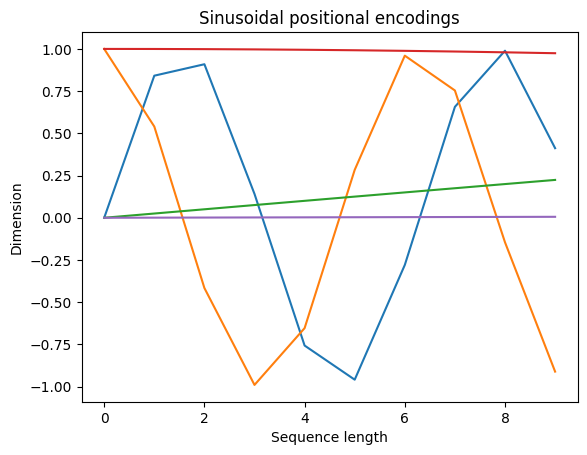

In [9]:
# implement sinusoidal positional encoding

def sinusoidal_positional_encoding(seq_len, d_model):
    """
    Generate sinusoidal positional encodings.

    Args:
        seq_len (int): Length of the sequence.
        d_model (int): Dimensionality of the embedding.

    Returns:
        np.ndarray: Positional encodings of shape (seq_len, d_model).
    """
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    encodings = np.zeros((seq_len, d_model))
    div_term = np.exp(np.log(10000) * (-2 * (i // 2) / d_model))
    encodings[:, 0::2] = np.sin(pos * div_term[:, 0::2])
    encodings[:, 1::2] = np.cos(pos * div_term[:, 1::2])
    return encodings

# generate positional encodings
seq_len = 10
d_model = 5
pos_encodings = sinusoidal_positional_encoding(seq_len, d_model)
plt.plot(pos_encodings)
plt.xlabel("Sequence length")
plt.ylabel("Dimension")
plt.title("Sinusoidal positional encodings")
plt.show()


In [10]:
def positional_encoding(seq_len, d_model):
    """
    Generate sinusoidal positional encodings.

    Args:
        seq_len (int): Length of the sequence.
        d_model (int): Dimensionality of the encoding.

    Returns:
        np.ndarray: Positional encodings of shape (seq_len, d_model).
    """
    # Create an array of positions (shape: [seq_len, 1])
    pos = np.arange(seq_len)[:, None]
    # Create an array of dimensions (shape: [1, d_model])
    i = np.arange(d_model)[None, :]
    
    # Calculate the angle rates
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
    # Compute the angle values
    angles = pos * angle_rates
    
    # Apply sin to even indices and cos to odd indices
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(angles[:, 0::2])
    pe[:, 1::2] = np.cos(angles[:, 1::2])
    return pe

# Example: Compute and print positional encodings for a sequence length of 10 with 8 dimensions
seq_len = 10
d_model = 8
pe = positional_encoding(seq_len, d_model)
print(pe)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  9.98334166e-02  9.95004165e-01
   9.99983333e-03  9.99950000e-01  9.99999833e-04  9.99999500e-01]
 [ 9.09297427e-01 -4.16146837e-01  1.98669331e-01  9.80066578e-01
   1.99986667e-02  9.99800007e-01  1.99999867e-03  9.99998000e-01]
 [ 1.41120008e-01 -9.89992497e-01  2.95520207e-01  9.55336489e-01
   2.99955002e-02  9.99550034e-01  2.99999550e-03  9.99995500e-01]
 [-7.56802495e-01 -6.53643621e-01  3.89418342e-01  9.21060994e-01
   3.99893342e-02  9.99200107e-01  3.99998933e-03  9.99992000e-01]
 [-9.58924275e-01  2.83662185e-01  4.79425539e-01  8.77582562e-01
   4.99791693e-02  9.98750260e-01  4.99997917e-03  9.99987500e-01]
 [-2.79415498e-01  9.60170287e-01  5.64642473e-01  8.25335615e-01
   5.99640065e-02  9.98200540e-01  5.99996400e-03  9.99982000e-01]
 [ 6.56986599e-01  7.53902254e-01  6.44217687e-01  7.64842187e-01
   